C:\Users\Srushti S\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
Matplotlib is building the font cache; this may take a moment.


✅ File will be saved at: C:\Users\Srushti S\Documents\binance_data.xlsx
✅ Data saved to: C:\Users\Srushti S\Documents\binance_data.xlsx


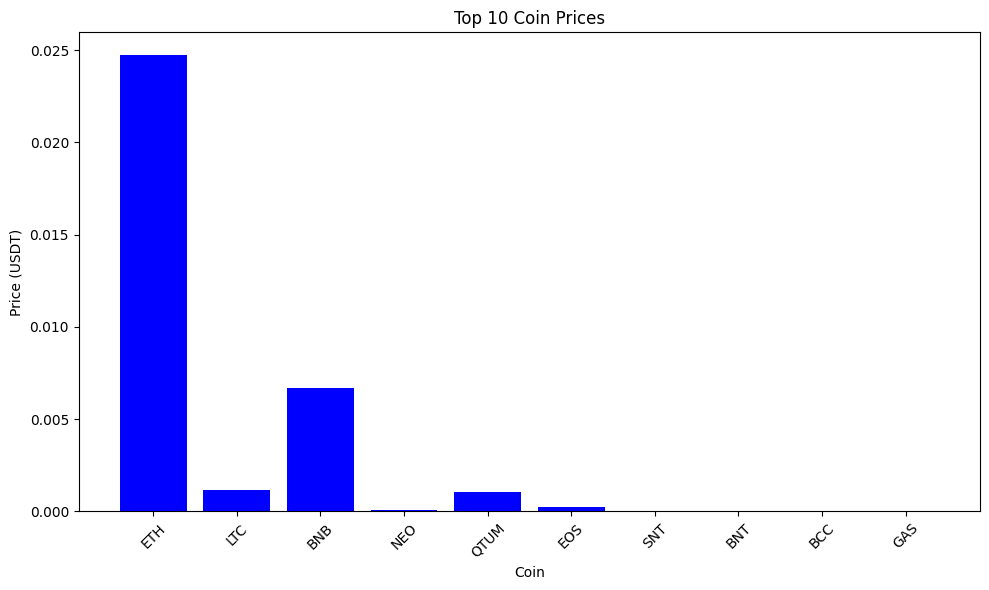

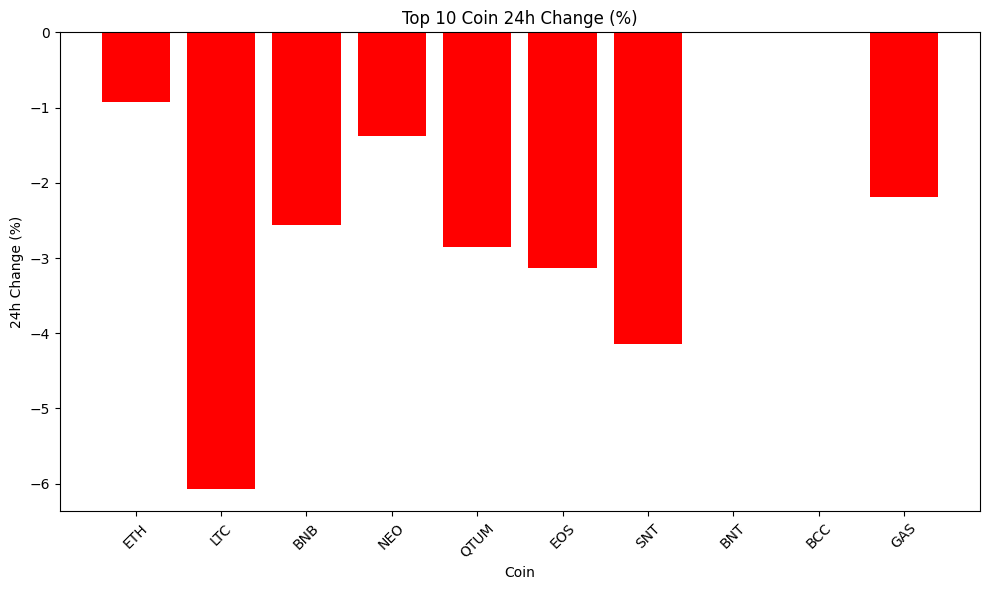

⏳ Waiting for 5 minutes...

✅ Data saved to: C:\Users\Srushti S\Documents\binance_data.xlsx


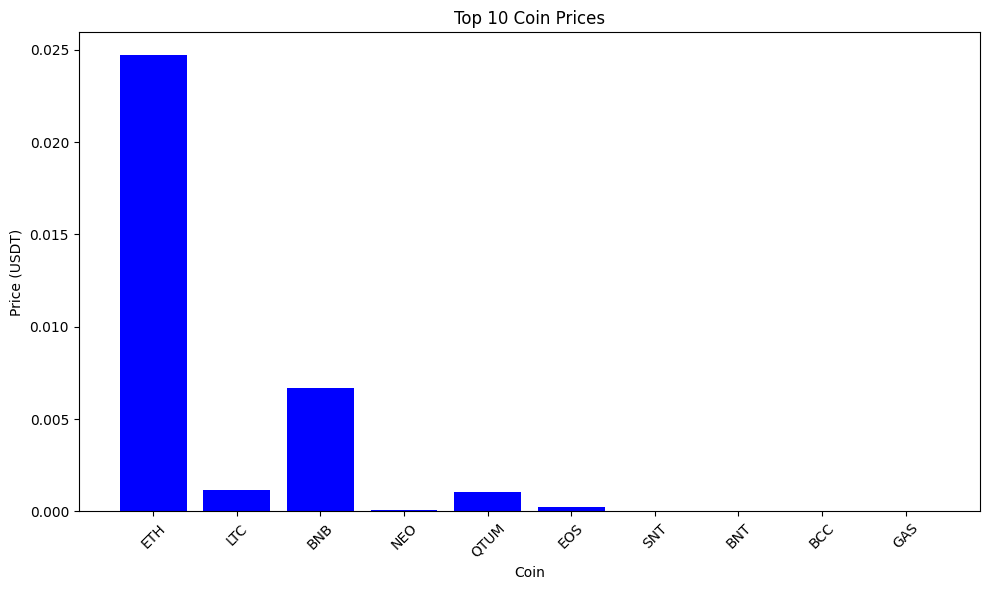

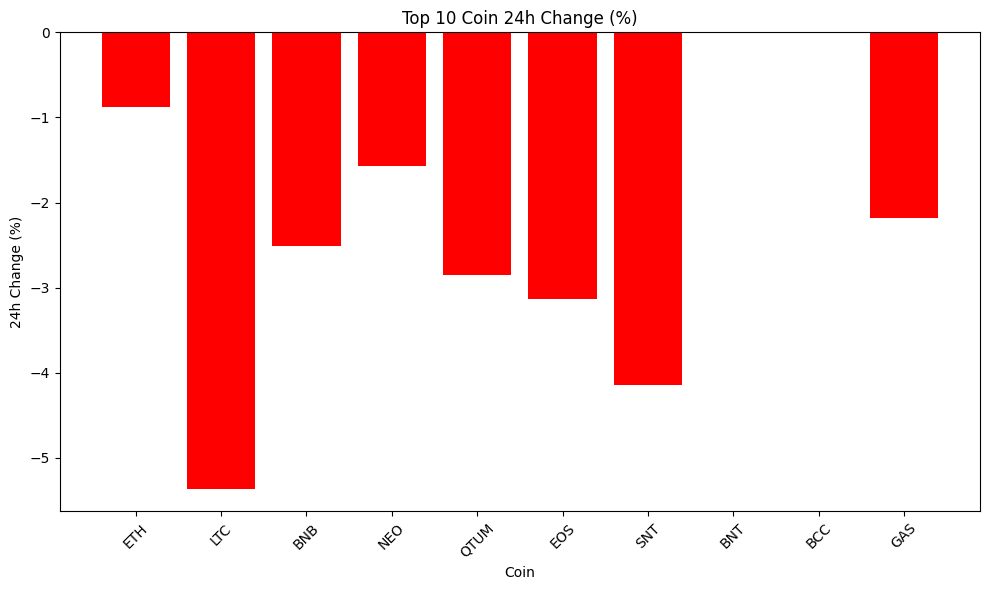

⏳ Waiting for 5 minutes...



KeyboardInterrupt: 

In [10]:

import requests
import pandas as pd
import os
import time
from datetime import datetime
import matplotlib.pyplot as plt

# Binance API endpoint
url = "https://api.binance.com/api/v3/ticker/24hr"

# Define Desktop path (fallback to Documents if Desktop is not accessible)
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "binance_data.xlsx")
documents_path = os.path.join(os.path.expanduser("~"), "Documents", "binance_data.xlsx")

# Ensure directory exists before saving
save_path = desktop_path if os.path.exists(os.path.dirname(desktop_path)) else documents_path
os.makedirs(os.path.dirname(save_path), exist_ok=True)

print(f"✅ File will be saved at: {save_path}")

def fetch_binance_data():
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()

        # Prepare lists for each sheet
        base_assets, quote_assets, prices, changes, highs, lows, volumes, timestamps = [], [], [], [], [], [], [], []

        for coin in data:
            symbol = coin["symbol"]

            # Extract Base Asset & Quote Asset
            base_asset = symbol[:-4] if symbol.endswith("USDT") else symbol[:-3]
            quote_asset = symbol[-4:] if symbol.endswith("USDT") else symbol[-3:]

            base_assets.append(base_asset)
            quote_assets.append(quote_asset)
            prices.append(float(coin["lastPrice"]))
            changes.append(float(coin["priceChangePercent"]))
            highs.append(float(coin["highPrice"]))
            lows.append(float(coin["lowPrice"]))
            volumes.append(float(coin["quoteVolume"]))
            timestamps.append(datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S"))  # Collect in UTC

        # Create a dictionary of DataFrames for different sheets
        data_frames = {
            "Price": pd.DataFrame({"Symbol Name": base_assets, "Quote Asset": quote_assets, "Price": prices}),
            "24h Change": pd.DataFrame({"Symbol Name": base_assets, "Quote Asset": quote_assets, "24h Change (%)": changes}),
            "24h High": pd.DataFrame({"Symbol Name": base_assets, "Quote Asset": quote_assets, "24h High": highs}),
            "24h Low": pd.DataFrame({"Symbol Name": base_assets, "Quote Asset": quote_assets, "24h Low": lows}),
            "Volume": pd.DataFrame({"Symbol Name": base_assets, "Quote Asset": quote_assets, "Volume (USDT)": volumes}),
            "Timestamp": pd.DataFrame({"Symbol Name": base_assets, "Quote Asset": quote_assets, "Timestamp": timestamps}),
        }

        # Save to an Excel file with multiple sheets
        with pd.ExcelWriter(save_path, engine="xlsxwriter") as writer:
            for sheet_name, df in data_frames.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)

        print(f"✅ Data saved to: {save_path}")

        # Plot some graphs
        plot_graphs(data_frames['Price'], data_frames['24h Change'])

def plot_graphs(price_df, change_df):
    # Price Plot
    plt.figure(figsize=(10, 6))
    plt.bar(price_df['Symbol Name'][:10], price_df['Price'][:10], color='blue')
    plt.title('Top 10 Coin Prices')
    plt.xlabel('Coin')
    plt.ylabel('Price (USDT)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 24h Change Plot
    plt.figure(figsize=(10, 6))
    plt.bar(change_df['Symbol Name'][:10], change_df['24h Change (%)'][:10], color='red')
    plt.title('Top 10 Coin 24h Change (%)')
    plt.xlabel('Coin')
    plt.ylabel('24h Change (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run script every 5 minutes
while True:
    fetch_binance_data()
    print("⏳ Waiting for 5 minutes...\n")
    time.sleep(300)  # Wait for 300 seconds (5 minutes)

